In [43]:
%pip install stop-words
%pip install matplotlib
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 215 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 28.8 MB 28.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [67]:
import collections

import numpy as np
from IPython.display import display, HTML
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=.9)
sns.set_style("whitegrid")


In [68]:
from stop_words import get_stop_words

stop_words = set(get_stop_words('uk'))
texts = []

In [69]:
UKR_ALPHABET = frozenset(['а', 'б', 'в', 'г', 'ґ', 'д', 'е', 'є', 'ж', 'з', 'и', 'і', 'ї', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ь', 'ю', 'я', ])
UKR_WORD_MODS = frozenset(['-', "'", '’'])
UKR_WORD_PARTS = frozenset(UKR_ALPHABET.union(UKR_WORD_MODS))

def normalize(word):
    return word.replace('’', "'")

def split_ukrainian(text):
    n = len(text)
    end = 0
    while end < n:
        start = end
        while end < n and text[end] in UKR_WORD_PARTS:
            end += 1

        word = text[start:end]
        if word and word not in UKR_WORD_MODS:
            yield normalize(word)
        
        end += 1

In [70]:
def count_words(text):
    return collections.Counter(word for word in split_ukrainian(text) if word in stop_words)

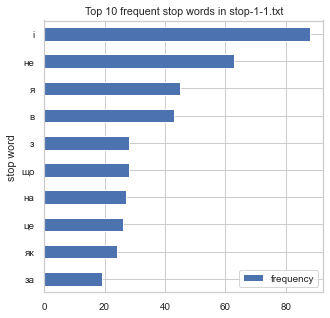

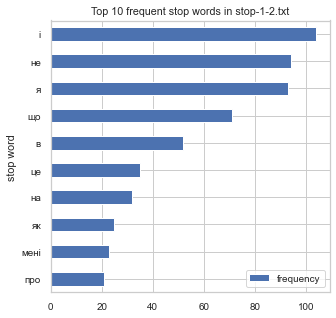

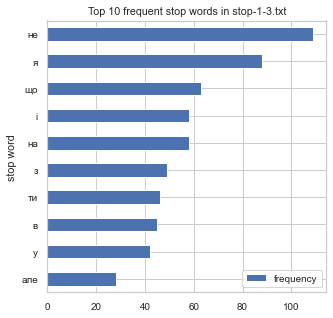

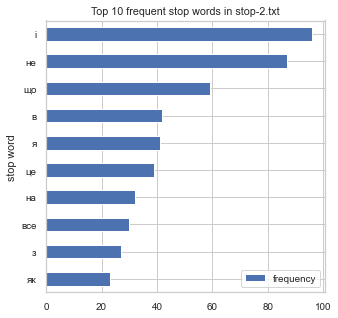

In [ ]:
import os

DATAIDIR = "./data"
files = [file for file in os.listdir(DATAIDIR) if file.endswith(".txt")]
files.sort()

for filename in files:
    display(HTML(f'<h2>{filename}</h2>'))
    with open(f'{DATAIDIR}/{filename}') as f:
        text = f.read().lower()
        data = count_words(text).most_common()

        df = pd.DataFrame(data, columns=['stop word', 'frequency'])
        #display(HTML(df.to_html(index=False)))
        
        fig, ax = plt.subplots(figsize=(5, 5))
        df.head(10).sort_values(by='frequency').plot.barh(x='stop word', y='frequency', ax=ax)
        ax.set_title(f'Top 10 frequent stop words in {filename}')
        plt.show()

    
    print()